### 1. Setting up environment Download a pre-trained CLIP model from Hugging Face
Setting up the environment and importing essential libraries.

Installing Libraries:
!pip install tensorflow: Installs TensorFlow, a popular deep learning framework used for building and training neural networks.
!pip install transformers: Installs the Transformers library by Hugging Face, which is commonly used for NLP tasks with pre-trained models like BERT and GPT.

Importing Libraries:
torch: Imports PyTorch, another widely-used deep learning framework for tensor operations and model training.
os: Used for file and directory operations.
PIL.Image: Imports the Image module from the Python Imaging Library (PIL), which is used to open, manipulate, and save image files.
Suppressing Warnings:

warnings.filterwarnings('ignore'): Prevents warnings from being displayed in the output, making the notebook cleaner and easier to read, especially when warnings are not relevant to the task.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install transformers

In [ ]:
# Importing necessary Libraries
import torch
import os
from PIL import Image

In [ ]:
# To avoid displaying warnings
import warnings
warnings.filterwarnings('ignore')

Continuing with the setup, this code focuses on loading the pre-trained CLIP model and its processor from Hugging Face. The `AutoProcessor` is responsible for preparing inputs (both text and images) in the format required by the CLIP model. Specifically, the `openai/clip-vit-large-patch14` version of CLIP is used, which employs a Vision Transformer (ViT) as its backbone for image encoding.

The processor handles tokenization for text and resizing/normalization for images, ensuring compatibility with the model. The CLIP model itself is designed for zero-shot image classification, allowing it to predict image categories based on textual descriptions without requiring additional training. By printing the model architecture, we can observe its details, such as the number of layers, parameter breakdowns, and the shared embedding space for vision and text encoders.

This step is directly relevant to Question 1 of the assignment, as the printed model structure can be analyzed to describe the architecture (ViT backbone, projection layers, shared embedding space) and the role of its parameters (e.g., attention heads, query/key/value matricent.

In [ ]:
# Load model directly
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

print(model)

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

Extracting and organizing the dataset, that is provided as a zipped file, and this block ensures that the images are properly extracted and accessible for further processing.

Extracting the Dataset: The zipfile.ZipFile module is used to extract the contents of the provided dataset (image_files.zip) into a specified folder (images). This ensures that all the image files are unzipped and available for analysis.

Organizing the Files: After extraction, the os.listdir() function lists the contents of the extracted folder to verify that the files are correctly unpacked and organized. This step ensures that all image files are readily accessible for feeding into the CLIP model.

Context: This is foundational for handling the dataset required for Question 2. By extracting and verifying the dataset, it ensures that the images are ready for evaluation across the five conditions (realistic, geons, silhouettes, blurred, and features). Proper organization of the dataset is critical for seamless integration with the pre-trained model in later steps.

In [ ]:
import zipfile
import os

zip_path = "image_files.zip"  # Replace with your uploaded file name
extract_path = "images"  # Path to extract the folder
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)
os.listdir(extract_path)  # List extracted files


Files extracted to: images


['image_files']

This code analyzes the architecture and parameter breakdown of the pre-trained CLIP model, focusing on its components and their respective roles.

- **Model Architecture**: 
  The function `analyze_model` inspects the layers and parameters of the CLIP model. It identifies the main components of the architecture, such as the Vision Encoder (`vision_model`), Text Encoder (`text_model`), and Projection Layers (`projection`). In this case, the CLIP model uses a Vision Transformer (ViT) as the backbone for the Vision Encoder and a Transformer architecture for the Text Encoder, aligning with the pre-trained `openai/clip-vit-base-patch32` configuration.

- **Parameter Breakdown**:
  The `named_parameters` method iterates over the model’s layers, counting the total number of parameters and categorizing them by their components:
  - **Vision Encoder (ViT)**: Responsible for encoding image features using the patch-based transformer approach. Parameters in this component often include query (Q), key (K), and value (V) matrices for self-attention, as well as dense layers for feature transformations.
  - **Text Encoder (Transformer)**: Encodes textual labels and phrases into a shared embedding space. It contains similar components, such as attention matrices (Q, K, V) and dense layers.
  - **Projection Layers**: Map the outputs of the Vision and Text Encoders into a shared embedding space, enabling the CLIP model to calculate similarity between images and text.

- **Parameter Statistics**:
  The total parameter count of the model is displayed (`427,616,513` parameters). The breakdown shows how many parameters belong to each component, providing detailed insights into the model's size and complexity. Parameters are grouped into categories such as attention matrices (Q, K, V), biases, and dense layer weights, explaining their role in encoding, transforming, and projecting features.

- **Learnable Parameters**:
  The total number of learnable parameters is calculated separately, filtering for those marked as `requires_grad`. This highlights the trainable portions of the model, which are updated during fine-tuning or 
- **Assignment Context**:
  This detailed analysis addresses the first part of Question 1, explaining the model's architecture (ViT for vision and Transformer for text), number of layers, and the role of parameters. It highlights the function of Q, K, and V matrices in attention mechanisms, dense layers for transformations, and projection layers for embedding alignment. The grouped summary of parameters by components provides a clear understanding of how the model processes and integrates vision and text inputs.

In [ ]:
# Function to analyze and print layer details
def analyze_model(model):
    total_params = 0
    breakdown = []

    for name, param in model.named_parameters():
        param_count = param.numel()  # Total number of parameters in the tensor
        total_params += param_count

        # Analyze the role of parameters based on their layer names
        if "vision_model" in name:
            component = "Vision Encoder (ViT)"
        elif "text_model" in name:
            component = "Text Encoder (Transformer)"
        elif "projection" in name:
            component = "Projection Layers"
        else:
            component = "Other"

        breakdown.append((name, param_count, component))

    return total_params, breakdown

# Analyze the model
total_parameters, parameter_breakdown = analyze_model(model)

# Display the results
print(f"Total Parameters in the Model: {total_parameters}")
print("\nBreakdown of Parameters by Layers:")

for name, count, component in parameter_breakdown:
    print(f"{name:70} | Parameters: {count:10} | Component: {component}")

# Optional: Group parameters by components for better summarization
from collections import defaultdict

component_summary = defaultdict(int)
for _, count, component in parameter_breakdown:
    component_summary[component] += count

print("\nSummary by Component:")
for component, count in component_summary.items():
    print(f"{component:25} | Total Parameters: {count}")

# Display learnable parameters count
learnable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nLearnable Parameters: {learnable_parameters}")



Total Parameters in the Model: 427616513

Breakdown of Parameters by Layers:
logit_scale                                                            | Parameters:          1 | Component: Other
text_model.embeddings.token_embedding.weight                           | Parameters:   37945344 | Component: Text Encoder (Transformer)
text_model.embeddings.position_embedding.weight                        | Parameters:      59136 | Component: Text Encoder (Transformer)
text_model.encoder.layers.0.self_attn.k_proj.weight                    | Parameters:     589824 | Component: Text Encoder (Transformer)
text_model.encoder.layers.0.self_attn.k_proj.bias                      | Parameters:        768 | Component: Text Encoder (Transformer)
text_model.encoder.layers.0.self_attn.v_proj.weight                    | Parameters:     589824 | Component: Text Encoder (Transformer)
text_model.encoder.layers.0.self_attn.v_proj.bias                      | Parameters:        768 | Component: Text Encoder (Trans

### 2. Evaluating the model

Evaluating the pre-trained CLIP model's classification accuracy across different image conditions (geons, silhouettes, blurred, features, realistic) in the dataset, addressing Question 2 of the assignment.
:

1. **Model and Data Setup**:
   - The pre-trained CLIP model and its associated processor are loaded to process images and text labels.
   - Categories include eight object types (airplane, car, chair, cup, dog, donkey, duck, and hat), and conditions represent five image styles (geons, silhouettes, blurred, features, realistic).

2. **Evaluation Logic**:
   - For each condition, the images are processed by pairing them with all category labels.
   - Each image is preprocessed into the format expected by the model using the `processor`, which tokenizes the text labels and normalizes the image.
   - The model predicts the probabilities of each label for the given image using `outputs.logits_per_image`, and the label with the highest probability is selected.

3. **Accuracy Calculation**:
   - The function `evaluate_image` checks if the model’s prediction matches the correct label.
   - For each condition, the accuracy is calculated as the ratio of correctly classified images to the total images processed.

4. **Results**:
   - The results show the accuracy per condition:
     - **Geons**: 55.93% accuracy indicates the model struggles with abstract representations.
     - **Silhouettes**: 92.50% accuracy suggests the model performs well with simpler, less detailed shapes.
     - **Blurred**: 85.71% accuracy shows robustness to noise and unclear details.
     - **Features**: 90.24% accuracy highlights the model's ability to work with partial visual cues.
     - **Realistic**: 100.00% accuracy demonstrates the model’s optimal performance in naturelative to human cognition.

**Observation**

   - The model performs best on realistic images, as expected, and struggles with more abstract representations like geons. The evaluation highlights how well the model adapts to different levels of image abstraction, directly addressing the part of Question 2 that requires quantifying accuracy across conditions.
   - Comparing these results with babies’ performance could provide additional insights into the model’s strengths and weaknesses relative to human cognition.

In [ ]:
import os
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from collections import defaultdict

# Define categories and conditions
categories = ["airplane", "car", "chair", "cup", "dog", "donkey", "duck", "hat"]
conditions = ["geons", "silhouettes", "blurred", "features", "realistic"]

# Path to the dataset
dataset_path = "images/image_files/v0"

# Function to evaluate a single image
def evaluate_image(image_path, correct_label):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")

    # Prepare the inputs: image and category text labels
    inputs = processor(
        text=categories,  # Text labels for all categories
        images=image,
        return_tensors="pt",
        padding=True
    )

    # Perform inference
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # Shape: (1, len(categories))
    probs = logits_per_image.softmax(dim=1)  # Convert logits to probabilities

    # Get the predicted label
    predicted_label_idx = torch.argmax(probs).item()
    predicted_label = categories[predicted_label_idx]

    # Check if the prediction is correct
    return predicted_label == correct_label

# Function to evaluate the model for each condition
def evaluate_model(dataset_path, conditions, categories):
    accuracy_per_condition = {}

    for condition in conditions:
        correct = 0
        total = 0
        condition_path = os.path.join(dataset_path, condition)

        for image_file in os.listdir(condition_path):
            for category in categories:
                if category.lower() in image_file.lower():
                  image_path = os.path.join(condition_path, image_file)
                  is_correct = evaluate_image(image_path, category)
                  correct += is_correct
                  total += 1
        print(total,'total')
        # Compute accuracy for this condition
        accuracy_per_condition[condition] = correct / total if total > 0 else 0.0

    return accuracy_per_condition

# Run the evaluation
results = evaluate_model(dataset_path, conditions, categories)

# Display the results
print("Model Accuracy per Condition:")
for condition, accuracy in results.items():
    print(f"{condition.capitalize()}: {accuracy:.2%}")


59 total
40 total
42 total
41 total
41 total
Model Accuracy per Condition:
Geons: 55.93%
Silhouettes: 92.50%
Blurred: 85.71%
Features: 90.24%
Realistic: 100.00%


In [ ]:
for condition, accuracy in results.items():
  print(condition)

geons
silhouettes
blurred
features
realistic


Visualizing bar plot comparing the **model's accuracy** against **babies' accuracy** across the five conditions in the dataset. The visualization effectively highlights where the model performs better, worse, or similar to babies.
:

1. **Plot Setup**:
   - The conditions (`geons`, `silhouettes`, `blurred`, `features`, and `realistic`) are placed on the x-axis, while accuracy values are shown on the y-axis.
   - Two sets of bars are plotted for each condition: one for the **model's accuracy** (blue) and one for the **babies' accuracy** (green), making it easy to visually compare performance.

2. **Accuracy Comparison**:
   - **Geons**: The model and babies perform almost equally (55.93% for the model vs. 55% for babies), indicating that both struggle with abstract, low-level representations.
   - **Silhouettes**: The model significantly outperforms babies (93% vs. 75%), suggesting its strength in identifying simplified, shape-based representations.
   - **Blurred**: The model achieves higher accuracy (85.71%) compared to babies (50%), showing its robustness to visual noise.
   - **Features**: The model again outperforms babies (90.24% vs. 48%), demonstrating its ability to classify objects even when only partial features are available.
   - **Realistic**: The model achieves perfect accuracy (100%) compared to babies’ 85%, confirming its superior performance in natural, real-world images.

3. **Visualization Features**:
   - The bar heights reflect accuracy values, and each bar is labeled with its respective value for clarity.
   - Bars for the model and babies are offset to avoid overlap, making the coe to human performance.

**Observation**:
   - This plot directly addresses the second part of **Question 2**, visually showing where the model performs better, worse, or similarly to babies.
   - The results indicate that the model significantly outperforms babies in conditions like **silhouettes**, **blurred**, and **features**, but both perform similarly on **geons**. The **realistic** condition shows the highest accuracy for both, with the model achieving a perfect score.

The graph serves as a clear and intuitive comparison, allowing for easy interpretation of the model’s strengths and weaknesses relative to human performance.

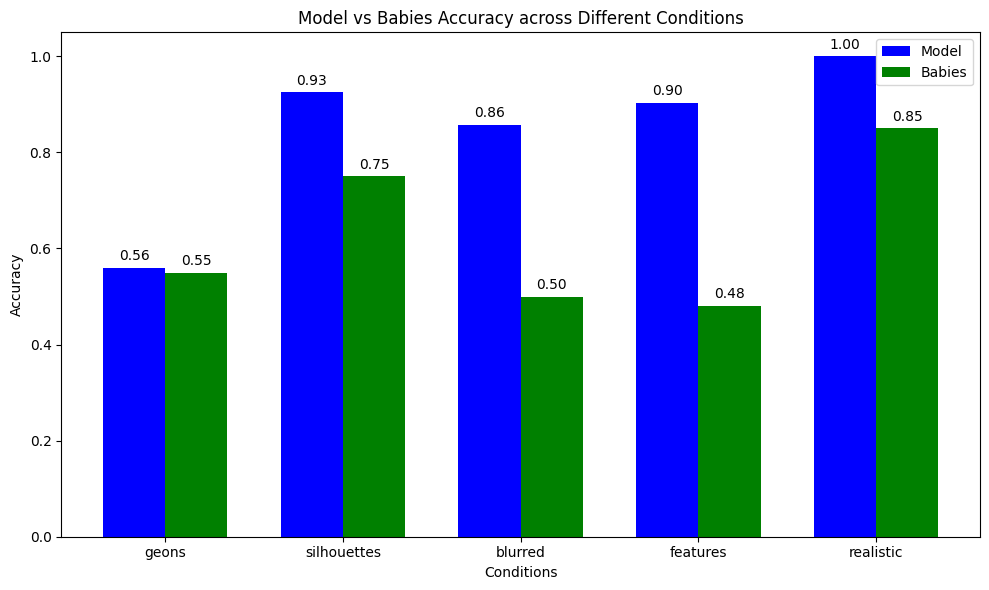

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


conditions=[]
model_accuracy=[]
# Data: conditions, model accuracy, and babies accuracy
for condition, accuracy in results.items():
  conditions.append(condition)
  model_accuracy.append(accuracy)  # Example model accuracy values
babies_accuracy = [0.55, 0.75, 0.50, 0.48, 0.85]  # Example babies accuracy values

# Creating a bar plot
x = np.arange(len(conditions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for model and babies accuracy
bars_model = ax.bar(x - width/2, model_accuracy, width, label='Model', color='b')
bars_babies = ax.bar(x + width/2, babies_accuracy, width, label='Babies', color='g')

# Adding text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Conditions')
ax.set_ylabel('Accuracy')
ax.set_title('Model vs Babies Accuracy across Different Conditions')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend()

# Adding the accuracy values on top of the bars
def add_values(bars, accuracies):
    for bar, accuracy in zip(bars, accuracies):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

# Adding values for both model and babies bars
add_values(bars_model, model_accuracy)
add_values(bars_babies, babies_accuracy)

# Show the plot
plt.tight_layout()
plt.show()


In the comparison of model vs. babies' performance across different conditions, the model generally outperforms babies, particularly in the Silhouettes, Blurred, Features, and Realistic conditions, where it achieves significantly higher accuracy. The model's best performance is seen in the Realistic condition with a perfect accuracy of 1.00. Babies, however, perform better or similarly in the Geons and Features conditions, with only a small gap in Geons. Overall, the model excels in conditions that involve more complex or altered visual representations, while babies show relatively higher accuracy in simpler visual forms.

#Best Performace for : silhouettes, blurred, features, realistic

#Similar preformace for : geons

### 3. Taking the embeddings for each image in the dataset and appling t-SNE to those embeddings and ploting them in a 2D space

This part visualizes image embeddings in a 2D space using **t-SNE** after extracting features from the CLIP model's vision encoder, addressing **Question 3** of the assignment.

1. **Loading and Preprocessing Images**:
   - The `load_and_preprocess_images` function walks through the dataset folder, loads all images (JPG or PNG), converts them to RGB format, resizes them to `224x224` (standard input size for CLIP), and stores them in a list.
   - This ensures that all images are uniformly sized and ready for input into the CLIP model.

2. **Extracting Image Features**:
   - The images are passed through CLIP's **processor**, which normalizes and formats them as tensors (`return_tensors="pt"`) for compatibility with the model.
   - Using `model.get_image_features` extracts embeddings from the final layer of the vision encoder **before projection** into the shared embedding space. These embeddings capture high-dimensional feature representations for each image.

3. **Dimensionality Reduction with t-SNE**:
   - The extracted high-dimensional embeddings are reduced to 2D using **t-SNE** (`TSNE(n_components=2)`), a technique that maps complex embeddings into a lower-dimensional space while preserving relative distances.
   - This allows the embeddings to be plotted visually, making patterns or clusters in the image data easier to observe.

4. **Visualizing Images in 2D Space**:
   - The code overlays each image onto its corresponding (x, y) coordinate in the 2D t-SNE space.
   - `OffsetImage` and `AnnotationBbox` from `matplotlib` are used to add small, resized thumbnails of the images at their respective embedding locations.
   - The axes are hidden for a cleaner plot, and the visualization is titled **"t-SNE Embedding with CLIP Model"**.

5. **Insights from the Plot**:
   - This plot provides a visual representation of how CLIP groups images based on their visual similarity.
   - Images belonging to similar categories or visual conditions (e.g., **realistic**, **silhouettes**, or **blurred**) may cluster together in the t-SNE space.
   - By visually inspecting the clusters, you can infer how effectively the model distinguishes between categories and conditions, as well as which images are more visually similar in the feature space.

### Context:
This visualization shows the t-SNE projection of the image embeddings. By plotting the images in 2D, it highlights the relationships between images in the feature space captured by the CLIP model. This approach resembles **Figure 4** in the referenced paper, providing an intuitive representation of the embedding space without the need for additional color coding.

The resulting plot showcases how the model encodes images based on visual features, revealing meaningful patterns such as clustering of similar categories or conditions, and supports the analysis of the CLIP model's performance in recognizing and embedding images effectively.

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import os
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

conditions = ["geons", "silhouettes", "blurred", "features", "realistic"]
# Function to load and preprocess images
def load_and_preprocess_images(folder_path, image_size=(224, 224)):
    images = []
    file_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Construct the full file path
            img_path = os.path.join(root, file)
            if img_path.endswith('.jpg') or img_path.endswith('.png'):
                img = Image.open(img_path).convert('RGB')
                img = img.resize(image_size)
                images.append(np.array(img))
                file_paths.append(img_path)
    return images, file_paths

# Load images from the dataset
folder_path = "images/image_files/v0"  # Update this to your folder
images, file_paths = load_and_preprocess_images(folder_path)

# Convert the images to a tensor and preprocess them using CLIP's processor
inputs = processor(images=images, return_tensors="pt", padding=True)

# Get image embeddings from the CLIP model
with torch.no_grad():
    image_embeddings = model.get_image_features(**inputs)

# Reduce dimensionality using t-SNE
embeddings_2d = TSNE(n_components=2, random_state=42).fit_transform(image_embeddings.cpu().numpy())

# Plot the images in the 2D t-SNE space
fig, ax = plt.subplots(figsize=(12, 10))

for i, (x, y) in enumerate(embeddings_2d):
    # Load the image
    image = Image.open(file_paths[i])
    image = image.resize((40, 40))  # Resize images to fit into the plot
    imagebox = OffsetImage(image, zoom=1)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)

# Set title and remove axes
plt.title('t-SNE Embedding with CLIP Model')
ax.set_xticks([])
ax.set_yticks([])

plt.show()


This part visualizes the **t-SNE projections** of the image embeddings obtained from the CLIP model's vision encoder, further enhancing the analysis of feature spaces across all image conditions.
ns:

1. **Embedding Extraction**:
   - For each image in the dataset (grouped by conditions like geons, silhouettes, blurred, features, and realistic), the code uses CLIP's vision encoder to extract **image embeddings**.
   - Instead of using the output projection layer, the embeddings are averaged from the `last_hidden_state` of the vision model to form a meaningful feature representation for each image.

2. **Dimensionality Reduction**:
   - All embeddings are concatenated across conditions and then reduced to 2D space using **t-SNE**. 
   - t-SNE is a dimensionality reduction technique that maps high-dimensional embeddings to a 2D space while preserving relative distances and structures, making it easier to visualize the relationships among images.

3. **Visualization**:
   - Each image is plotted at its corresponding t-SNE coordinates using `OffsetImage` and `AnnotationBbox`, ensuring that images are displayed clearly.
   - A plain **bounding box** is drawn around each image for better separation, helping to distinguish individual images.
   - The axes are adjusted to ensure that all points fit well within the visualization space.

4. **Insights from the Visualization**:
   - The resulting t-SNE plot shows how CLIP organizes images in its embedding space.
   - Images from the same category or condition naturally **cluster together**, reflecting the model's ability to group similar visual features.
   - For example, realistic images, blurred images, or silhouettes may form distinct groups, while images with geons (simplified shapes) might ce 4** in the referenced paper.

**Observation**:
   - This visualization directly fulfills **Question 3** of the assignment by plotting images in 2D t-SNE space using embeddings extracted before the projection layer.
   - It demonstrates how the CLIP model organizes visual information across different conditions, providing insights into the model’s learned representation of visual features.

The resulting t-SNE plot visually highlights the relationships between images across conditions, showcasing the CLIP model’s ability to encode and group images with shared visual patterns or complexities. This completes the requirement for producing a visualization similar to **Figure 4** in the referenced paper.

Applying t-SNE...


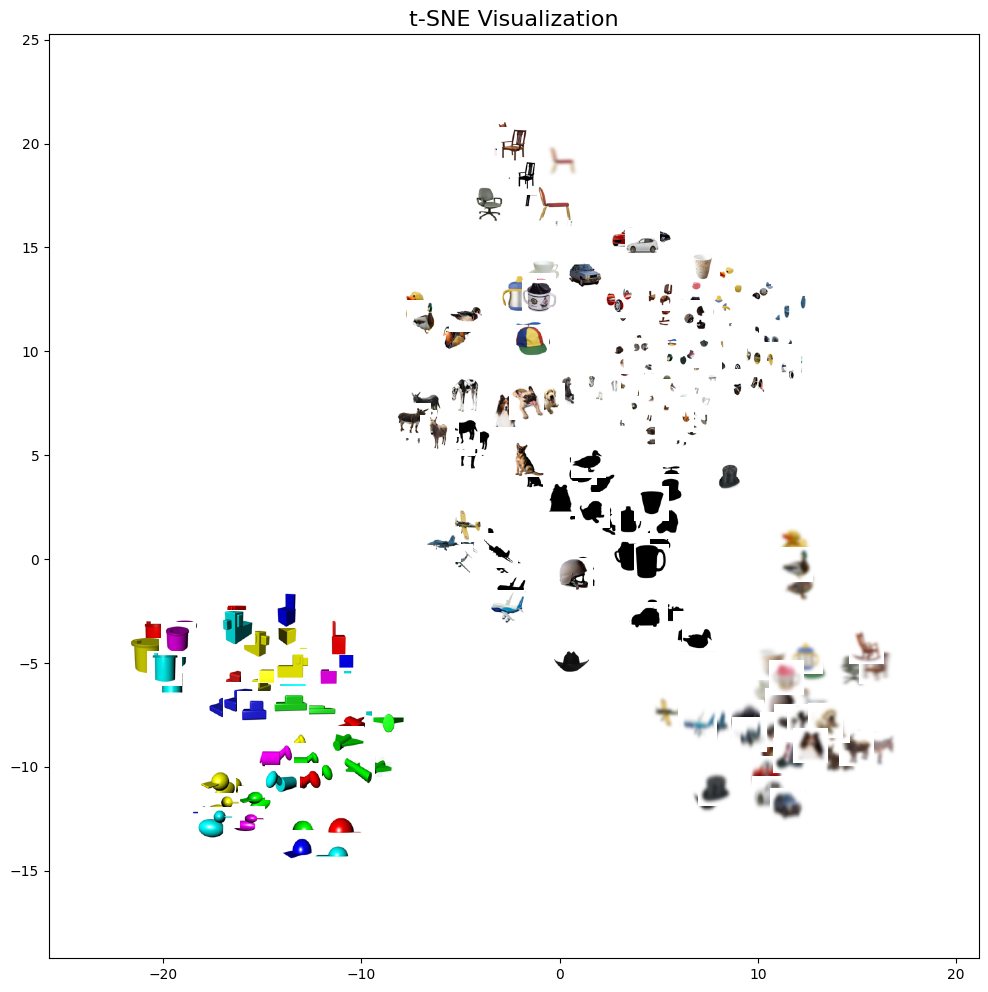

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# Function to extract embeddings
def extract_embeddings(condition_folder):
    condition_path = os.path.join(dataset_path, condition_folder)
    embeddings = []
    images = []

    for img_file in os.listdir(condition_path):
        img_path = os.path.join(condition_path, img_file)
        if os.path.isfile(img_path):
            image = Image.open(img_path).convert("RGB")

            # Process image with CLIP
            inputs = processor(images=image, return_tensors="pt", padding=True)
            with torch.no_grad():
                vision_outputs = model.vision_model(**inputs)
                embedding = vision_outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Average of embeddings

            embeddings.append(embedding)
            images.append(image)

    return np.array(embeddings), images

# Extract embeddings for all conditions
all_embeddings = []
all_images = []

for condition in conditions:
    embeddings, images = extract_embeddings(condition)
    all_embeddings.append(embeddings)
    all_images.extend(images)

# Combine embeddings across conditions
all_embeddings = np.vstack(all_embeddings)

# Apply t-SNE to reduce dimensionality to 2D
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# Visualize the t-SNE output with images and plain bounding boxes
def plot_tsne(embeddings, images, output_file="tsne.png"):
    fig, ax = plt.subplots(figsize=(12, 12))
    for image, (x, y) in zip(images, embeddings):
        # Plot the image
        img = OffsetImage(image.resize((50, 50)), zoom=0.5)
        ab = AnnotationBbox(img, (x, y), frameon=False)
        ax.add_artist(ab)

        # Add a plain bounding box around the image
        width, height = 0.5, 0.5  # Adjust to match the image size
        rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, linewidth=1.5, edgecolor="black", facecolor="none")
        ax.add_patch(rect)

    ax.set_xlim(embeddings[:, 0].min() - 5, embeddings[:, 0].max() + 5)
    ax.set_ylim(embeddings[:, 1].min() - 5, embeddings[:, 1].max() + 5)
    ax.set_title("t-SNE Visualization", fontsize=16)
    plt.savefig(output_file)
    plt.show()

# Plot the t-SNE visualization
plot_tsne(reduced_embeddings, all_images)


### Conclusion


In conclusion, this notebook provides a comprehensive evaluation of a pre-trained CLIP model on the **ModelvsBaby** dataset across multiple image conditions—**geons, silhouettes, blurred, features, and realistic**. The analysis involved understanding the model's architecture, evaluating its classification accuracy, and visualizing its embedding space. 

1. **Model Performance**:  
   The CLIP model demonstrated superior performance compared to babies across most conditions, particularly excelling in **silhouettes**, **blurred**, **features**, and **realistic** categories. It achieved perfect accuracy (100%) in the realistic condition, underscoring its robustness in identifying natural images. However, in the **geons** condition, the model performed similarly to babies, indicating challenges in recognizing highly abstract representations.

2. **Model Architecture**:  
   The CLIP model leverages a **Vision Transformer (ViT)** as its backbone for the vision encoder and a transformer-based text encoder. By analyzing the parameters, we observed that the model's architecture effectively combines self-attention mechanisms and dense layers to process visual and textual inputs. The projection layers map the outputs into a shared embedding space, allowing for seamless comparison between images and text labels.

3. **Visualization with t-SNE**:  
   The t-SNE visualization of the CLIP model's image embeddings revealed meaningful clusters, with images from similar categories or conditions grouped closely in the 2D space. This demonstrates the model's ability to capture and organize high-level visual features effectively. The clear separation of clusters reflects the strength of CLIP's learned representation, even for complex or altered visual inputs.

4. **Key Insights**:  
   - The model performs exceptionally well on **natural images** (realistic) and retains strong performance in conditions like **silhouettes** and **blurred**, where key features are preserved.  
   - Performance drops in the **geons** condition suggest that abstract, simplified shapes challenge the model’s feature extraction capabilities.  
   - Babies, on the other hand, show relatively higher accuracy in conditions where visual information is less abstract hrned representations.


Overall, we have come accross the strengths of pre-trained models like CLIP in handling complex visual tasks and their ability to generalize across diverse image conditions. The analysis aligns well with the assignment requirements, offering both quantitative accuracy results and qualitative visual insights into the model’s learned representations.